In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
Data = pd.read_csv('/content/Car Sale.csv')

In [12]:
Data

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


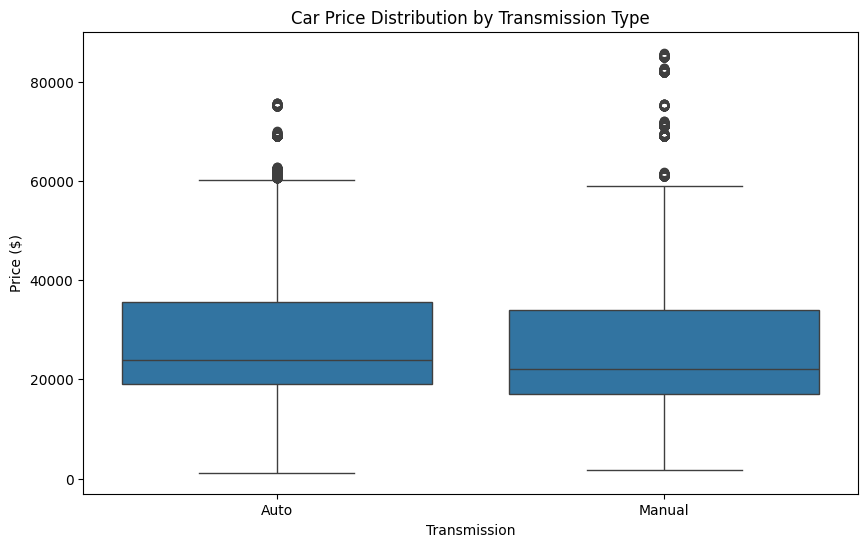

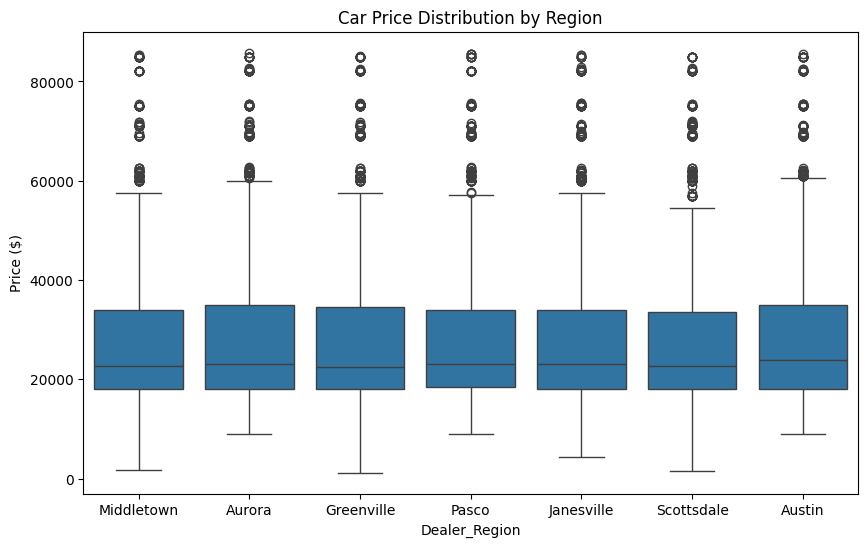

<ipython-input-17-ec94d61d7a77>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_gender_income = data.groupby(['Gender', pd.cut(data['Annual Income'], bins=5)])['Price ($)'].mean().unstack()


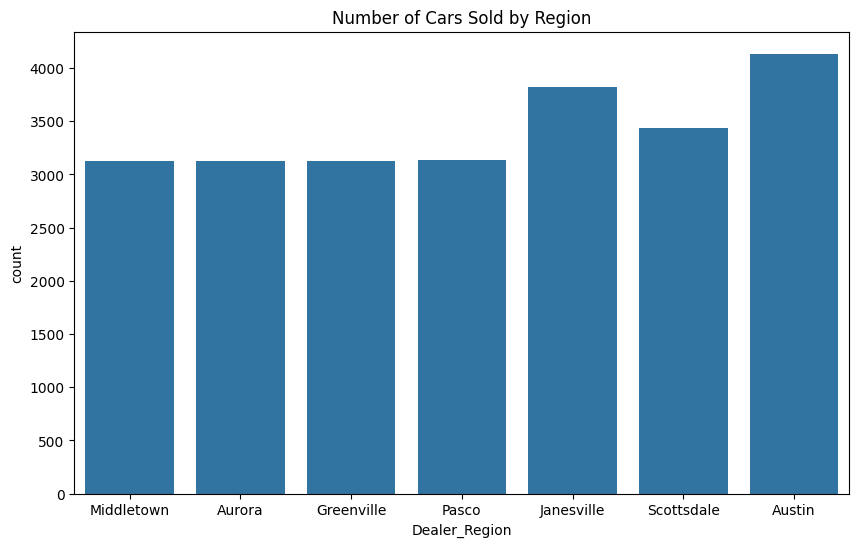

<ipython-input-17-ec94d61d7a77>:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_bracket_price = data.groupby(pd.cut(data['Annual Income'], bins=5))['Price ($)'].mean()


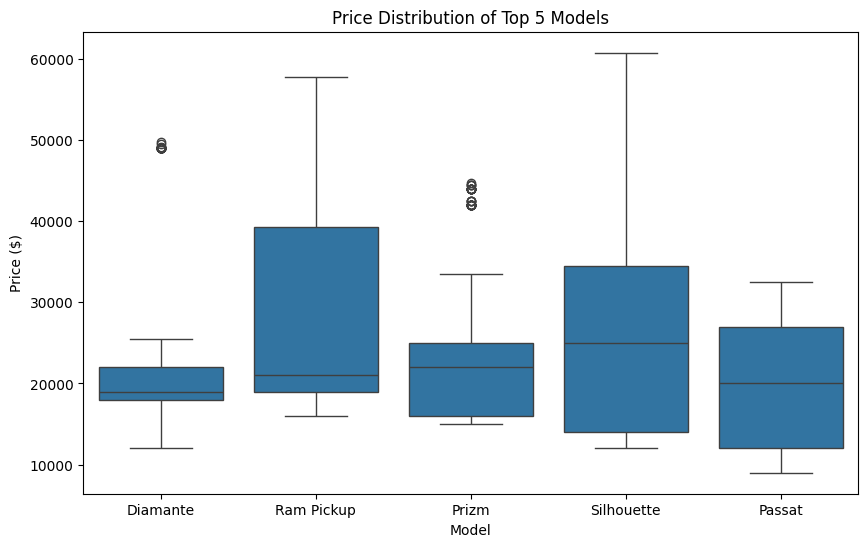

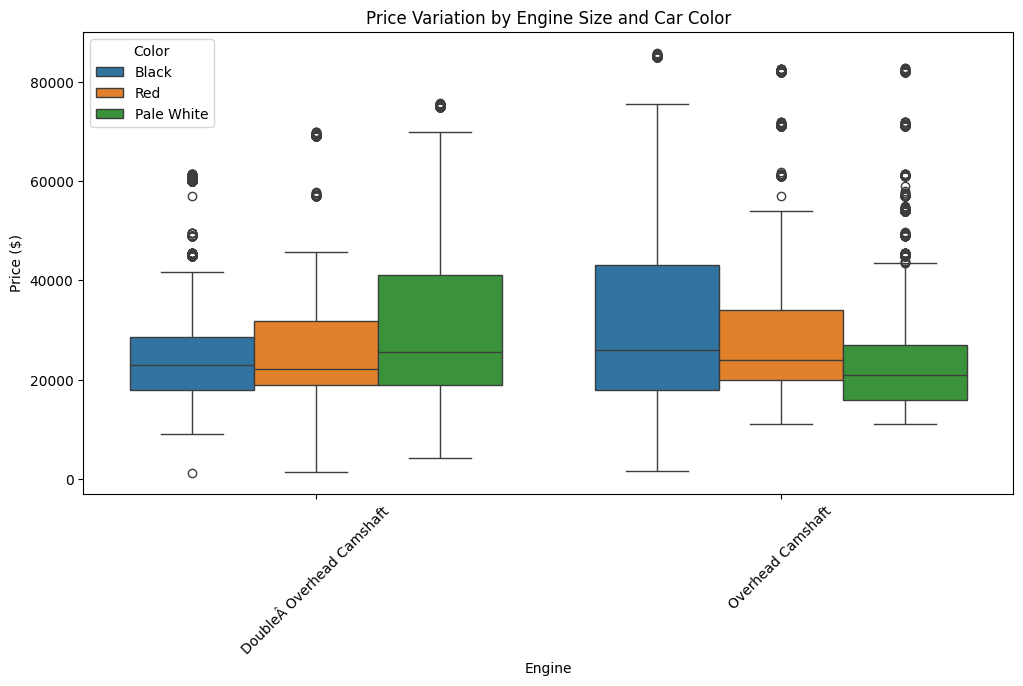

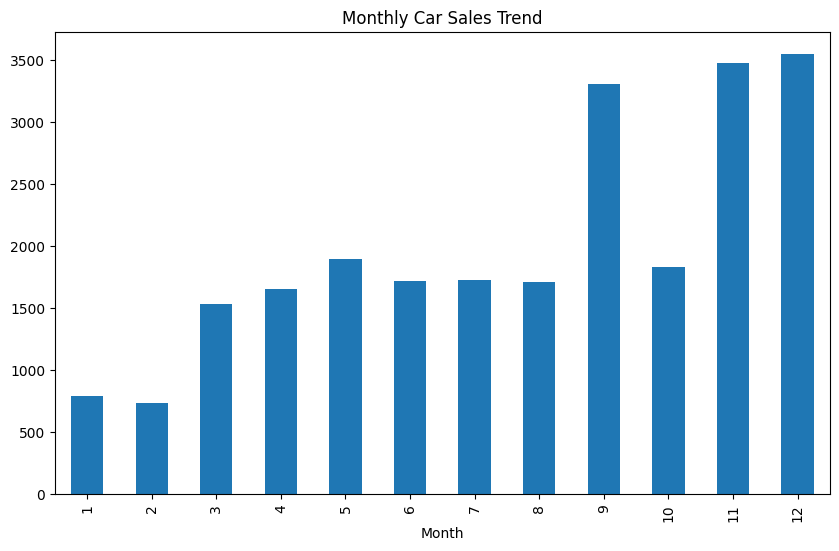

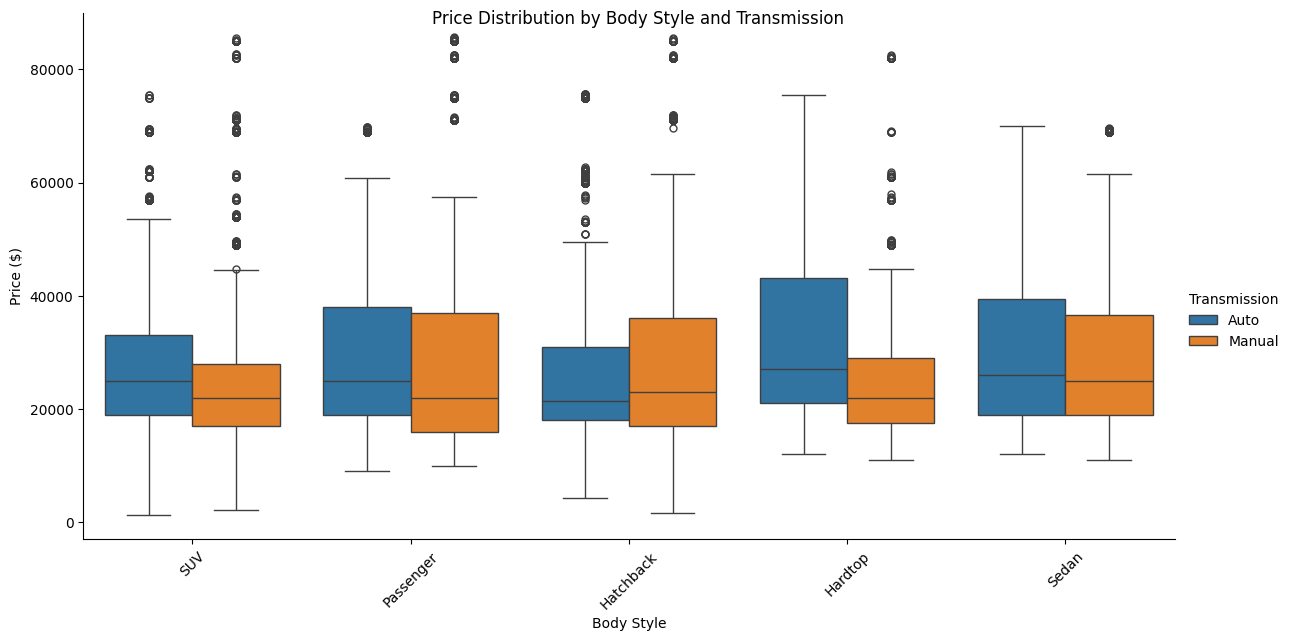

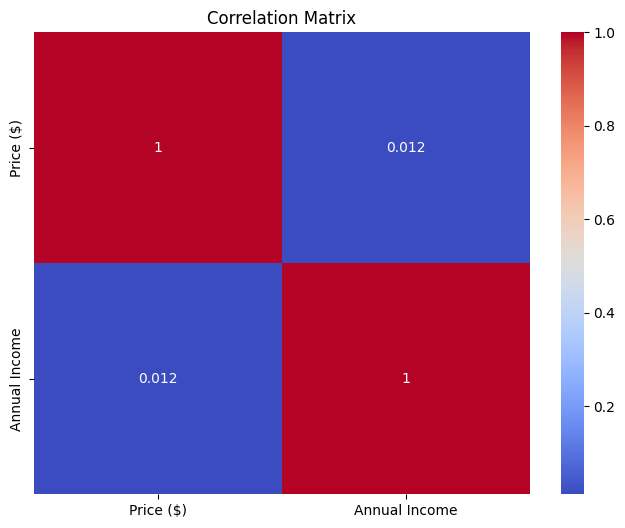

In [17]:
# 1. Average selling price for each dealer
avg_price_by_dealer = data.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)

# 2. Car brand with highest price variation
price_variation_by_brand = data.groupby('Company')['Price ($)'].std().sort_values(ascending=False)

# 3. Price distribution by transmission type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=Data)
plt.title('Car Price Distribution by Transmission Type')
plt.show()

# 4. Price distribution across regions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=Data)
plt.title('Car Price Distribution by Region')
plt.show()

# 5. Distribution of cars by body style
body_style_distribution = data['Body Style'].value_counts()

# 6. Average price by gender and income
avg_price_by_gender_income = data.groupby(['Gender', pd.cut(data['Annual Income'], bins=5)])['Price ($)'].mean().unstack()

# 7. Distribution of car prices and number of cars by region
plt.figure(figsize=(10, 6))
sns.countplot(x='Dealer_Region', data=data)
plt.title('Number of Cars Sold by Region')
plt.show()

# 8. Average price by engine size
avg_price_by_engine = data.groupby('Engine')['Price ($)'].mean()

# 9. Price variation by income bracket
income_bracket_price = data.groupby(pd.cut(data['Annual Income'], bins=5))['Price ($)'].mean()

# 10. Top 5 car models by sales and price distribution
top_5_models = data['Model'].value_counts().head(5).index
top_5_data = data[data['Model'].isin(top_5_models)]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Price ($)', data=top_5_data)
plt.title('Price Distribution of Top 5 Models')
plt.show()

# 11. Price variation by engine size and car color
plt.figure(figsize=(12, 6))
sns.boxplot(x='Engine', y='Price ($)', hue='Color', data=data)
plt.xticks(rotation=45)
plt.title('Price Variation by Engine Size and Car Color')
plt.show()

# 12. Seasonal trend in sales
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
monthly_sales = data['Month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.title('Monthly Car Sales Trend')
plt.show()

# 13. Price distribution by body style and transmission
g = sns.catplot(x='Body Style', y='Price ($)', hue='Transmission', data=data, kind='box', height=6, aspect=2)
g.set_xticklabels(rotation=45)
g.fig.suptitle('Price Distribution by Body Style and Transmission')

# 14. Correlation matrix and heatmap
correlation_matrix = data[['Price ($)', 'Annual Income']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 15. Average price by car model and engine type
avg_price_by_model_engine = data.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack().fillna(0)
